In [1]:
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
port = "/dev/ttyUSB0"


In [2]:
scope= serial.Serial(port) 

In [3]:
scope.write(str.encode('DAT:SOU CH1\n'))
scope.write(str.encode('CURV?\n'))
rawch1 = scope.readline().decode('utf-8').strip(":CURVE")
scope.write(str.encode('DAT:SOU CH2\n'))
scope.write(str.encode('CURV?\n'))
rawch2 = scope.readline().decode('utf-8').strip(":CURVE")
scope.write(str.encode('DAT:SOU CH3\n'))
scope.write(str.encode('CURV?\n'))
rawch3 = scope.readline().decode('utf-8').strip(":CURVE")
scope.write(str.encode('DAT:SOU CH4\n'))
scope.write(str.encode('CURV?\n'))
rawch4 = scope.readline().decode('utf-8').strip(":CURVE")

scope.write(str.encode('MEASU?\n'))
measurment= scope.readline().decode('utf-8')

SerialException: device reports readiness to read but returned no data (device disconnected or multiple access on port?)

In [75]:
## write csv
filename= "Scope_"+datetime.now().isoformat(sep="_")+".csv"
f=open(filename,"a")
f.write(str(rawch1+rawch2+rawch3+rawch4))
f.close()

In [2]:
filename="Scope_2023-08-25_14:27:38.263299.csv"

In [3]:
df=pd.read_csv(filename,header=None)

In [4]:
df.loc[1][1]

318

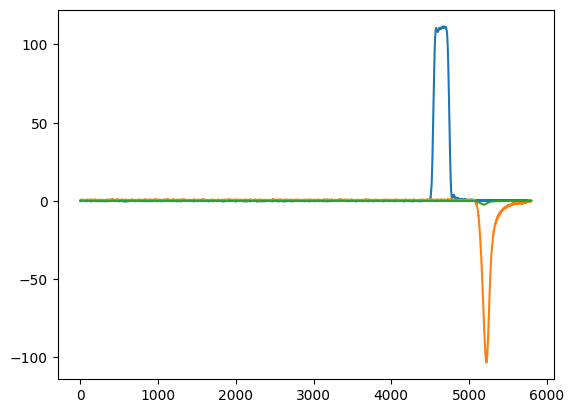

In [9]:
start=0
end=5800
plt.plot((df.loc[0][start:end]-df.loc[0][0])/200)
#plt.plot(df.loc[1][start:end]-df.loc[1][0])
plt.plot((df.loc[2][start:end]-df.loc[2][0])/126.622)
plt.plot((df.loc[3][start:end]-df.loc[3][0])/3481.28)

In [94]:
dynode=np.min((df.loc[2][start:end]-df.loc[2][0])/32.5)

In [95]:
anode=np.min((df.loc[3][start:end]-df.loc[3][0])/686.315)

In [96]:
dynode/anode

32.60538136639199

In [89]:
np.min(df.loc[2][start:end]-df.loc[2][0])

-13087

In [90]:
np.min(df.loc[3][start:end]-df.loc[3][0])

-8476